In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
# Drop non-numeric columns which cannot be used in correlation calculation


file_path = 'dataset/cleaned_data.csv'


# Load the dataset
data_fillmean = pd.read_csv(file_path)
# Assuming 'data_fillmean' is your DataFrame

# Assuming the date column is named 'date'
data_fillmean['date'] = pd.to_datetime(data_fillmean['date'])
data_fillmean['year'] = data_fillmean['date'].dt.year  # Extract year
data_fillmean['month'] = data_fillmean['date'].dt.month  # Extract month
data_fillmean['day'] = data_fillmean['date'].dt.day  # Extract day

# Now you can drop the original 'date' column if it's no longer needed
data_fillmean.drop('date', axis=1, inplace=True)


In [5]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data_fillmean.select_dtypes(include=[np.number]))
data_fillmean_minmax = pd.DataFrame(data_minmax, columns=data_fillmean.select_dtypes(include=[np.number]).columns)

# Standardization
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data_fillmean.select_dtypes(include=[np.number]))
data_fillmean_standardized = pd.DataFrame(data_standardized, columns=data_fillmean.select_dtypes(include=[np.number]).columns)

# Display the first few rows to confirm the transformation
print(data_fillmean_minmax.head())
print(data_fillmean_standardized.head())

      price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0  0.291530     0.250       0.15     0.173524     0.2         0.0   0.0   
1  0.319231     0.250       0.25     0.279070     0.0         0.0   0.0   
2  0.393738     0.250       0.30     0.291592     0.0         0.0   0.0   
3  0.517915     0.375       0.35     0.280859     0.0         0.0   0.0   
4  0.460602     0.125       0.05     0.091234     0.0         0.0   0.0   

   condition  sqft_basement  yr_renovated  house_age  years_since_renovation  \
0       0.50       0.000000      0.995531   0.517544                0.162162   
1       0.75       0.000000      0.000000   0.421053                0.000000   
2       0.75       0.434783      0.000000   0.447368                0.000000   
3       0.75       0.347826      0.989076   0.333333                0.279279   
4       0.50       0.000000      0.990070   0.666667                0.261261   

   price_per_sqft  bed_to_bath_ratio  year  month       day  
0     

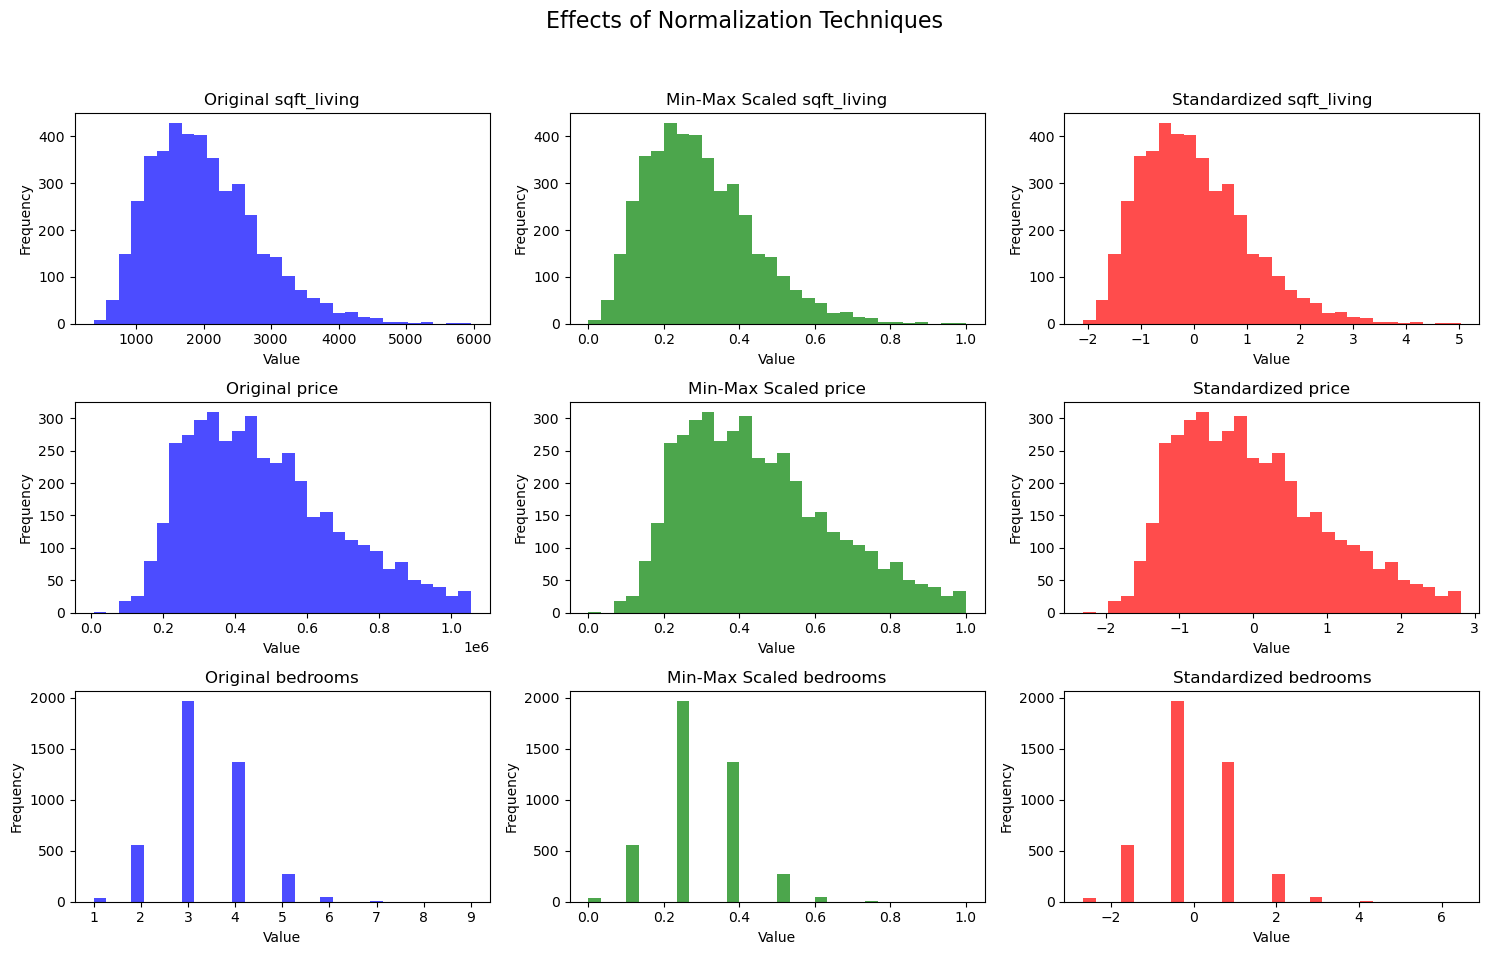

In [6]:
columns_to_visualize = ['sqft_living', 'price', 'bedrooms']

# Create histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Effects of Normalization Techniques', fontsize=16)

# Plot each column
for i, col in enumerate(columns_to_visualize):
    # Original data
    axes[i, 0].hist(data_fillmean[col], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original {col}')
    
    # Min-Max scaled data
    axes[i, 1].hist(data_fillmean_minmax[col], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Min-Max Scaled {col}')
    
    # Standardized data
    axes[i, 2].hist(data_fillmean_standardized[col], bins=30, color='red', alpha=0.7)
    axes[i, 2].set_title(f'Standardized {col}')

# Set labels
for ax in axes.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

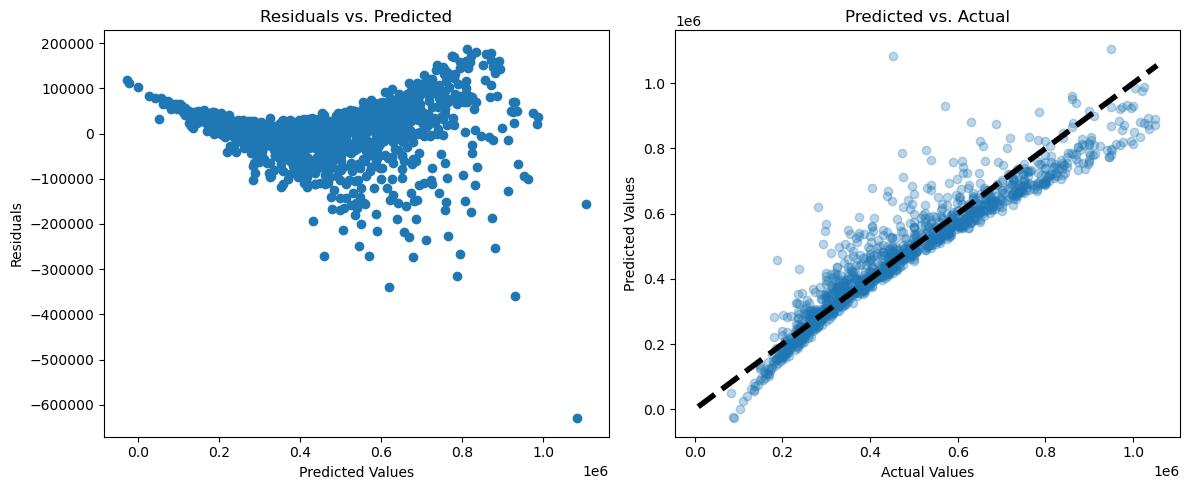

RMSE for Min-Max Normalized Data: 66062.17721317594


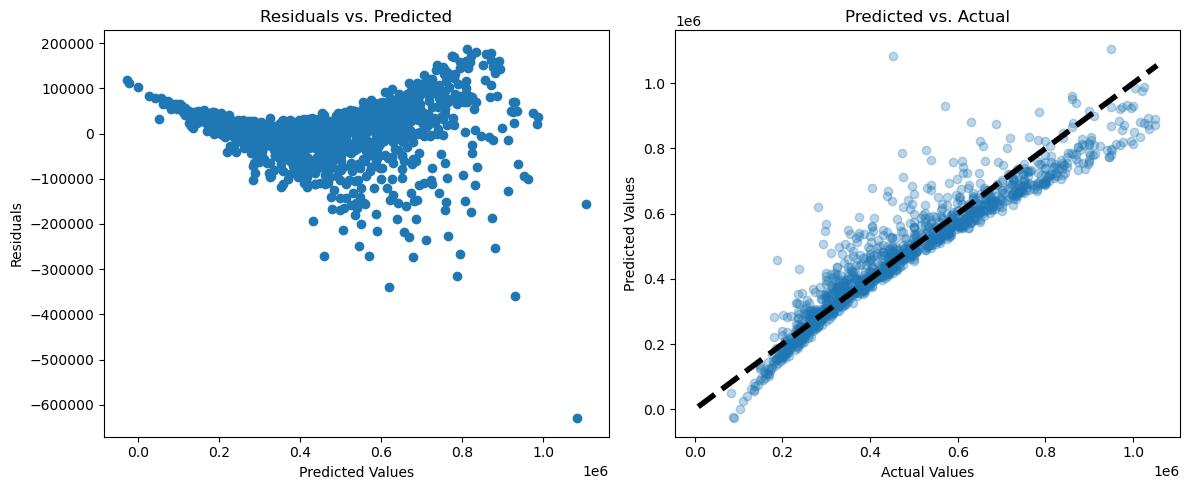

RMSE for Standardized Data: 66062.17721317592


In [7]:
def model_fit_and_evaluate(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Generate plots
    plt.figure(figsize=(12, 5))
    
    # Plot residuals
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, y_test - y_pred)
    plt.title('Residuals vs. Predicted')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    
    # Plot Predicted vs Actual
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    plt.tight_layout()
    plt.show()
    
    return rmse

# Prepare input features and target variable
y = data_fillmean['price'].values  # assuming 'price' is the target variable

# Min-Max Normalized Data
X_minmax = data_fillmean_minmax.drop('price', axis=1).values  # assuming 'price' was included and needs to be dropped
rmse_minmax = model_fit_and_evaluate(X_minmax, y)
print(f"RMSE for Min-Max Normalized Data: {rmse_minmax}")

# Standardized Data
X_standard = data_fillmean_standardized.drop('price', axis=1).values  # same assumption as above
rmse_standard = model_fit_and_evaluate(X_standard, y)
print(f"RMSE for Standardized Data: {rmse_standard}")